In [4]:
import pickle as pk
import pandas as pd

In [5]:
mq_clk_history = pd.read_pickle("../data/mq_1sample_clicked_history.pkl").drop_duplicates('full_text').head(50)

In [10]:
mq_clk_history['customDimensions_Title'].tail(10).values

array(['Aspen reportedly opts for New York as venue for $4bn IPO',
       'Tui considers moving stock exchange listing from FTSE 100 to Frankfurt',
       'Canadian Fintech Nuvei Partners With Microsoft To Provide Seamless Payment Experiences',
       "LSE's Ongoing Struggle for Stability",
       'RBI unlikely to cut rates before June: Deutsche Bank',
       'FCA-Authorised Digital Asset Derivatives Venue GFO-X Raises $30m Series B Funding, Led by M&G Investments',
       'Google’s Gemini looks impressive but still trails', nan,
       'OTP Bank implements iGCB’s Digital Core and Lending platform',
       "Federal Jury Rules Against Google's Android App Store In Epic Games Lawsuit - Alphabet (NASDAQ:GOOG), Alphabet (NASDAQ:GOOGL)"],
      dtype=object)

In [548]:
behaviors_cols = ["Impression ID","User ID","Time","History","Impressions" ]
news_cols = ["News ID","Title","Category","Abstract"]


In [549]:
interactions = pd.read_table("/home/felipe/New Recommendations/data/small_filtered_behaviors_train.tsv",names=["Impression ID",
"User ID",
"Time", 
"History",
"Impressions" ])
news = pd.read_table("/home/felipe/New Recommendations/data/MINDsmall_dev/news.tsv",names=["News ID",
"Category",
"SubCategory",
"Title",
"Abstract",
"URL",
"Title Entities" ,
"Abstract Entities"])

In [550]:
news.head()

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N18955,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


In [551]:
candidate_text = """ London Stock Exchange Group Faces Trading Glitch, Swiftly Resolves the Issue \n\n

London, UK - The London Stock Exchange Group (LSEG) experienced a catastrophic trading glitch yesterday, causing significant disruption and concern within the financial industry. The glitch, which occurred during peak trading hours, led to widespread confusion and temporary suspension of trading activities. However, the LSEG's prompt response and effective resolution mitigated the impact on investors and restored stability to the market.

The trading glitch, initially triggered by a technical malfunction within the LSEG's trading systems, resulted in erratic price movements and erroneous trade executions. This unexpected turn of events raised alarm bells and prompted the exchange to take immediate action to safeguard the integrity of the market.

The LSEG's technical teams, comprising experienced professionals, swiftly identified the root cause of the glitch and initiated a systematic investigation to rectify the issue. Their expertise and coordinated efforts enabled them to resolve the problem within a relatively short period, restoring normal trading operations and minimizing potential losses for investors.

During the temporary suspension of trading, the LSEG maintained open lines of communication with market participants, ensuring transparency and timely updates. The exchange's proactive approach in managing the situation helped to reassure investors and maintain confidence in the stability of the market.

Regulators and industry experts have commended the LSEG for its rapid response and effective resolution of the trading glitch. The exchange's robust contingency plans and backup systems played a vital role in minimizing the disruption and restoring normalcy.

While the incident did cause temporary uncertainty, the LSEG's ability to swiftly address the issue underscores the resilience of the global financial system. It serves as a reminder of the continuous efforts made by exchanges and regulators to monitor and maintain the integrity of trading platforms."""
candidate2_text = """ Cyber-attrack provokesd Catastrophic Systems Failure  at LSEG, Prompting Urgent Recovery Efforts \n\n

London, UK - The London Stock Exchange Group (LSEG) experienced a catastrophic systems failure yesterday, causing widespread disruption and chaos within the financial industry. The incident, which stemmed from an unforeseen technical malfunction, has emphasized the critical need for robust infrastructure and disaster recovery plans in today's fast-paced trading environment.

The systems failure struck during peak trading hours, leading to a temporary suspension of all trading activities on the LSEG platform. The unexpected outage sent shockwaves through the global financial community, resulting in significant losses for investors and traders.

The LSEG's highly skilled technical teams immediately initiated efforts to identify the root cause of the failure and restore normal operations swiftly. Working around the clock, they employed comprehensive diagnostics and troubleshooting measures to rectify the issue as quickly as possible.

While initial investigations indicate that the systems failure was caused by an internal glitch rather than external interference or malicious activity, further analysis is underway to determine its exact nature. The LSEG is committed to conducting a thorough review of its infrastructure and implementing necessary improvements to prevent similar incidents from occurring in the future.

During this challenging time, effective communication has been paramount for maintaining transparency and managing market expectations. The LSEG promptly provided updates to market participants, regulators, and stakeholders about progress toward resolving the issue while outlining contingency plans put into action.

Regulators have expressed concern over potential vulnerabilities exposed by such a significant systems failure within one of the world's most prominent stock exchanges. They are calling for enhanced risk management practices across all financial institutions to minimize disruptions that could impact investor confidence and stability in global markets.

Recognizing its responsibility to safeguard investor interests, the LSEG is working closely with regulatory bodies to assess any potential impact on market integrity or investor protection during this period of disruption. Investor compensation measures are being carefully considered where appropriate.

As normal trading operations gradually resume following extensive recovery efforts by LSEG's dedicated technical teams, market participants are urged to remain vigilant about potential volatility resulting from delayed transactions or backlog clearance.

The incident serves as a stark reminder of how heavily reliant modern financial markets are on technology-driven infrastructure. It underscores both regulatory obligations and industry-wide responsibilities towards ensuring robust operational resilience against unforeseen technological failures or disruptions.

The London Stock Exchange Group is determined not only to rectify immediate concerns but also proactively strengthen its systems' resilience moving forward

"""
candidate3_text = """ Cyber-attrack provokesd Catastrophic Systems Failure  at LSEG, Almost a Billion in losses \n\n

London, UK - The London Stock Exchange Group (LSEG) experienced a catastrophic systems failure yesterday, causing widespread disruption and chaos within the financial industry. The incident, which stemmed from an unforeseen technical malfunction, has emphasized the critical need for robust infrastructure and disaster recovery plans in today's fast-paced trading environment.

The systems failure struck during peak trading hours, leading to a temporary suspension of all trading activities on the LSEG platform. The unexpected outage sent shockwaves through the global financial community, resulting in significant losses for investors and traders.

The LSEG's highly skilled technical teams immediately initiated efforts to identify the root cause of the failure and restore normal operations swiftly. Working around the clock, they employed comprehensive diagnostics and troubleshooting measures to rectify the issue as quickly as possible.

While initial investigations indicate that the systems failure was caused by an internal glitch rather than external interference or malicious activity, further analysis is underway to determine its exact nature. The LSEG is committed to conducting a thorough review of its infrastructure and implementing necessary improvements to prevent similar incidents from occurring in the future.

During this challenging time, effective communication has been paramount for maintaining transparency and managing market expectations. The LSEG promptly provided updates to market participants, regulators, and stakeholders about progress toward resolving the issue while outlining contingency plans put into action.

Regulators have expressed concern over potential vulnerabilities exposed by such a significant systems failure within one of the world's most prominent stock exchanges. They are calling for enhanced risk management practices across all financial institutions to minimize disruptions that could impact investor confidence and stability in global markets.

Recognizing its responsibility to safeguard investor interests, the LSEG is working closely with regulatory bodies to assess any potential impact on market integrity or investor protection during this period of disruption. Investor compensation measures are being carefully considered where appropriate.

As normal trading operations gradually resume following extensive recovery efforts by LSEG's dedicated technical teams, market participants are urged to remain vigilant about potential volatility resulting from delayed transactions or backlog clearance.

The incident serves as a stark reminder of how heavily reliant modern financial markets are on technology-driven infrastructure. It underscores both regulatory obligations and industry-wide responsibilities towards ensuring robust operational resilience against unforeseen technological failures or disruptions.

The London Stock Exchange Group is determined not only to rectify immediate concerns but also proactively strengthen its systems' resilience moving forward

"""
candidate4_text = """ London Stock Exchange Group Faces Catastrophic Systems Failure, Almost 10 Billion in losses \n\n

London, UK - The London Stock Exchange Group (LSEG) experienced a catastrophic systems failure yesterday, causing widespread disruption and chaos within the financial industry. The incident, which stemmed from an unforeseen technical malfunction, has emphasized the critical need for robust infrastructure and disaster recovery plans in today's fast-paced trading environment.

The systems failure struck during peak trading hours, leading to a temporary suspension of all trading activities on the LSEG platform. The unexpected outage sent shockwaves through the global financial community, resulting in significant losses for investors and traders.

The LSEG's highly skilled technical teams immediately initiated efforts to identify the root cause of the failure and restore normal operations swiftly. Working around the clock, they employed comprehensive diagnostics and troubleshooting measures to rectify the issue as quickly as possible.

While initial investigations indicate that the systems failure was caused by an internal glitch rather than external interference or malicious activity, further analysis is underway to determine its exact nature. The LSEG is committed to conducting a thorough review of its infrastructure and implementing necessary improvements to prevent similar incidents from occurring in the future.

During this challenging time, effective communication has been paramount for maintaining transparency and managing market expectations. The LSEG promptly provided updates to market participants, regulators, and stakeholders about progress toward resolving the issue while outlining contingency plans put into action.

Regulators have expressed concern over potential vulnerabilities exposed by such a significant systems failure within one of the world's most prominent stock exchanges. They are calling for enhanced risk management practices across all financial institutions to minimize disruptions that could impact investor confidence and stability in global markets.

Recognizing its responsibility to safeguard investor interests, the LSEG is working closely with regulatory bodies to assess any potential impact on market integrity or investor protection during this period of disruption. Investor compensation measures are being carefully considered where appropriate.

As normal trading operations gradually resume following extensive recovery efforts by LSEG's dedicated technical teams, market participants are urged to remain vigilant about potential volatility resulting from delayed transactions or backlog clearance.

The incident serves as a stark reminder of how heavily reliant modern financial markets are on technology-driven infrastructure. It underscores both regulatory obligations and industry-wide responsibilities towards ensuring robust operational resilience against unforeseen technological failures or disruptions.

The London Stock Exchange Group is determined not only to rectify immediate concerns but also proactively strengthen its systems' resilience moving forward

"""
extra_candidates = ["London Stock Exchange Group PLC\nLSEG,\n-0.43%\nshares inched up 0.28% to £92.10 Monday, on what proved to be an all-around rough trading session for the stock market, with the FTSE 100 Index\nUKX,\n-0.09%\nfalling 0.39% to 7,594.91.\n\nLondon Stock Exchange Group PLC closed £2.28 short of its 52-week high (£94.38), which the company reached on December 14.\nTrading volume (330,075) remained 1.1 million below its 50-day average volume of 1.4 M.\n\nEditor's Note: This story was auto-generated by Automated Insights, an automation technology provider, using data from Dow Jones and FactSet. See our market data terms of use.",
       '‘Inflation … is not quite where we would like to see it.’\n\nLesetja Kganyago speaking in an interview on Bloomberg TV on the sidelines of the World Economic Forum in Davos. Image: Hollie Adams/Bloomberg\n\nSouth African Central Bank Governor Lesetja Kganyago ruled out cutting interest rates while inflation remains persistent.\n\n“Our real rates are not particularly high and inflation has come down – it’s within target – but it is not quite where we would like to see it,” Kganyago said Tuesday in an interview on Bloomberg TV on the sidelines of the World Economic Forum in Davos.\n\n“And if we are to make any policy adjustments, we would have to see that inflation has declined to our anchor, which is 4.5%.”\n\nThe South African Reserve Bank has held its benchmark interest rate unchanged at a 14-year-high of 8.25% since May 2023 and is expected to do so again when it meets next week.\n\nWhile inflation moderated toward the end of last year, the Reserve Bank has repeatedly said it is not convinced that price pressures are slowing to the midpoint of its 3% to 6% target band in a sustainable manner.\n\nInflation eased to 5.5% in November from 5.9% the prior month, primarily due to a sharp decline in fuel prices, although pressure in other categories such as food remain elevated. December inflation data will be released on January 24, one day before Kganyago announces the rate decision of the monetary policy committee.\n\nRead: SA’s inflation slows in November\n\nHigher for longer\n\nWhile pandemic-inflicted supply constraints responsible for propelling price pressures have eased, “inflation is still stubbornly high,” he said. “For it to be eventually conquered, we are going to have to keep rates higher for longer.”\n\nThe Reserve Bank will also watch South Africa’s public finances, which face spending pressures ahead of an election later this year in which the ruling African National Congress could lose its national majority for the first time since the end of White-minority rule in 1994.\n\nThe governor has repeatedly cautioned that the state of the country’s finances can dim the economic outlook and elevate borrowing costs. The central bank has also called out the burden imposed on business by repeated power cuts and snarled infrastructure due to the poor performance of the country’s electricity utility Eskom Holdings SOC Ltd. and port and freight-rail operator Transnet.\n\nFinance Minister Enoch Godongwana is expected to warn of the country’s deteriorating debt trajectory when he presents the annual budget later next month. Kganyago declined to comment directly on the budget, but said he took the Treasury at its word that it would keep the country on a sustainable fiscal path.\n\nRead: Godongwana warns of difficult budget next month\n\n“I have got no reason to second guess them,” he said. “I have got every reason that if they have made a commitment, they will meet that commitment. But fiscal policy is not going to be easy this year.”\n\n© 2024 Bloomberg',
       "LSEG’s Schwimmer: Regulators should be ‘careful’ about imposing rules on AI\n\nIndustry leaders were pessimistic about a proactive approach from regulators as finance embraces generative AI\n\nTuesday, 16 January 2024 at 15:07\n\nLondon Stock Exchange Group chief executive David Schwimmer has urged regulators to be cautious about imposing stringent rules on the use of artificial intelligence, claiming the financial services sector is only at the early stages of identifying the full set of opportunities posed by the new technology.\n\n“You have to be careful about putting those regulatory restrictions in place before we've really figured out what the opportunity is, what the potential is and what the development path looks like,”\xa0Schwimmer said during a panel at the World Economic Forum in Davos on 16 January.",
       ]


In [552]:
all_candidates = [candidate_text,candidate2_text,candidate3_text,candidate4_text]
all_candidates.extend(extra_candidates)

In [553]:
all_candidates

[" London Stock Exchange Group Faces Trading Glitch, Swiftly Resolves the Issue \n\n\n\nLondon, UK - The London Stock Exchange Group (LSEG) experienced a catastrophic trading glitch yesterday, causing significant disruption and concern within the financial industry. The glitch, which occurred during peak trading hours, led to widespread confusion and temporary suspension of trading activities. However, the LSEG's prompt response and effective resolution mitigated the impact on investors and restored stability to the market.\n\nThe trading glitch, initially triggered by a technical malfunction within the LSEG's trading systems, resulted in erratic price movements and erroneous trade executions. This unexpected turn of events raised alarm bells and prompted the exchange to take immediate action to safeguard the integrity of the market.\n\nThe LSEG's technical teams, comprising experienced professionals, swiftly identified the root cause of the glitch and initiated a systematic investigat

In [554]:
cand_dict = {'Title':[],"Abstract":[] }
for art in all_candidates:
    title, abs = art.split('\n\n',maxsplit=1)
    cand_dict['Title'].append(title)
    cand_dict['Abstract'].append(abs) 

In [555]:
art.split('\n\n',maxsplit=1)

['LSEG’s Schwimmer: Regulators should be ‘careful’ about imposing rules on AI',
 "Industry leaders were pessimistic about a proactive approach from regulators as finance embraces generative AI\n\nTuesday, 16 January 2024 at 15:07\n\nLondon Stock Exchange Group chief executive David Schwimmer has urged regulators to be cautious about imposing stringent rules on the use of artificial intelligence, claiming the financial services sector is only at the early stages of identifying the full set of opportunities posed by the new technology.\n\n“You have to be careful about putting those regulatory restrictions in place before we've really figured out what the opportunity is, what the potential is and what the development path looks like,”\xa0Schwimmer said during a panel at the World Economic Forum in Davos on 16 January."]

In [556]:
mq_clk_history.head()

,customDimensions_Title,full_text
154,Is Alphabet losing out to Microsoft & Amazon? ...,"Led by Alphabet, the\n\nNasdaq\n\nand the S&P ..."
313,NaN,By Tristan Veyet and Paolo Laudani\n\nOct 30 (...
314,NaN,RNS Number : 6883R\nEMIS Group PLC\n30 October...
518,ADIA Acquires a 40% Stake in Landmark Dividend,"[November 01, 2023]\n\nDigitalBridge Group, In..."
615,Amazon's $1 billion M365 cloud deal with Micro...,Amazon's multiyear commitment to use Microsoft...


In [557]:
cand_dict["Title"].extend(mq_clk_history["customDimensions_Title"].values)
cand_dict["Abstract"].extend(mq_clk_history["full_text"].values)


In [558]:
candidate_news = pd.DataFrame(cand_dict)

In [559]:
labels, levels = pd.factorize(candidate_news['Title'].fillna(" ").astype(str) +"\n\n"+ candidate_news['Abstract'].fillna(" ").astype(str))

In [560]:
candidate_news['News ID'] =  labels

In [561]:
levels2labels = { level:label for level, label in zip(levels,labels) }

In [562]:
news['Category'].unique()

array(['lifestyle', 'health', 'news', 'sports', 'weather',
       'entertainment', 'foodanddrink', 'autos', 'travel', 'video', 'tv',
       'finance', 'movies', 'music', 'kids', 'middleeast', 'games'],
      dtype=object)

In [563]:
candidate_news['Category'] = 'finance'

In [564]:
interactions.head()

,Impression ID,User ID,Time,History,Impressions
0,1,U13740,11/11/2019 9:05:58 AM,N45794 N19347 N31801,N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N43353 N8129 N1569 ...,N17059-1 N20495-0 N22407-0 N39317-0 N42977-0
2,3,U73700,11/14/2019 7:01:48 AM,N7563 N47289 N24233,N12330-0 N23877-0 N29739-0 N35389-0 N36226-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N53880 N41375,N27581-0 N35729-0
4,6,U19739,11/11/2019 6:52:13 PM,N14343 N32607 N32320 N22007 N24294 N8275 N6695...,N21119-1 N25722-0 N2869-0 N33619-1 N53696-0


In [565]:
mq_his_ids = (mq_clk_history["customDimensions_Title"].fillna(" ").astype(str)+ "\n\n"  + mq_clk_history["full_text"].fillna(" ").astype(str) ).map(levels2labels)

In [566]:
mq_his_ids = mq_his_ids.to_list()

In [567]:
mq_his_ids[:10]

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [568]:
fake_interactions = {}

In [569]:
fake_interactions['User ID'] = 1111

In [570]:
fake_interactions['Time'] = interactions['Time'].values[0]

In [571]:
behaviors_cols

['Impression ID', 'User ID', 'Time', 'History', 'Impressions']

In [572]:
fake_interactions['History'] = " ".join([str(x) for x in mq_his_ids])

In [573]:
#fake_interactions["Impressions"] = [ f"{levels2labels[cand]}-1" for cand in all_candidates] 


fake_interactions["Impressions"] = [ f"{levels2labels[cand]}-1 {levels2labels[cand]}-0" for cand in all_candidates] 


In [574]:
fake_interactions["Impressions_text"] = [cand for cand in all_candidates]

In [575]:
[fake_interactions['History']]* len(fake_interactions["Impressions"]) 

['7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56',
 '7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56',
 '7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56',
 '7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56',
 '7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56',
 '7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56',
 '7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38

In [576]:
num_candidates = len(fake_interactions["Impressions"])

In [577]:
fake_interactions['History'] = [fake_interactions['History']]*  num_candidates

In [578]:
fake_interactions["Time"] = fake_interactions["Time"]
fake_interactions["User ID"] = fake_interactions["User ID"]


In [579]:
behaviors_cols

['Impression ID', 'User ID', 'Time', 'History', 'Impressions']

In [580]:
df_fake_interactions = pd.DataFrame(fake_interactions)

In [581]:
df_fake_interactions

,User ID,Time,History,Impressions,Impressions_text
0,1111,11/11/2019 9:05:58 AM,7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 2...,0-1 0-0,London Stock Exchange Group Faces Trading Gli...
1,1111,11/11/2019 9:05:58 AM,7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 2...,1-1 1-0,Cyber-attrack provokesd Catastrophic Systems ...
2,1111,11/11/2019 9:05:58 AM,7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 2...,2-1 2-0,Cyber-attrack provokesd Catastrophic Systems ...
3,1111,11/11/2019 9:05:58 AM,7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 2...,3-1 3-0,London Stock Exchange Group Faces Catastrophi...
4,1111,11/11/2019 9:05:58 AM,7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 2...,4-1 4-0,"London Stock Exchange Group PLC\nLSEG,\n-0.43%..."
5,1111,11/11/2019 9:05:58 AM,7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 2...,5-1 5-0,‘Inflation … is not quite where we would like ...
6,1111,11/11/2019 9:05:58 AM,7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 2...,6-1 6-0,LSEG’s Schwimmer: Regulators should be ‘carefu...


In [582]:
df_fake_interactions.index.name = "Impression ID"

In [583]:
df_fake_interactions.reset_index()

,Impression ID,User ID,Time,History,Impressions,Impressions_text
0,0,1111,11/11/2019 9:05:58 AM,7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 2...,0-1 0-0,London Stock Exchange Group Faces Trading Gli...
1,1,1111,11/11/2019 9:05:58 AM,7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 2...,1-1 1-0,Cyber-attrack provokesd Catastrophic Systems ...
2,2,1111,11/11/2019 9:05:58 AM,7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 2...,2-1 2-0,Cyber-attrack provokesd Catastrophic Systems ...
3,3,1111,11/11/2019 9:05:58 AM,7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 2...,3-1 3-0,London Stock Exchange Group Faces Catastrophi...
4,4,1111,11/11/2019 9:05:58 AM,7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 2...,4-1 4-0,"London Stock Exchange Group PLC\nLSEG,\n-0.43%..."
5,5,1111,11/11/2019 9:05:58 AM,7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 2...,5-1 5-0,‘Inflation … is not quite where we would like ...
6,6,1111,11/11/2019 9:05:58 AM,7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 2...,6-1 6-0,LSEG’s Schwimmer: Regulators should be ‘carefu...


In [584]:
df_fake_interactions.reset_index(inplace=True)

In [585]:
df_fake_interactions[behaviors_cols].to_csv("data/synt_test/behaviors.tsv",sep='\t',index=False,header=False)

In [586]:
candidate_news[news_cols].to_csv("data/synt_test/news.tsv",sep='\t',index=False,header=False)

In [587]:
preds = pk.load(open("eval/2024-04-20_16-34-02/preds.pkl","rb"))

In [588]:
preds['pred'][::2]

[[0.9670626521110535],
 [0.9575716257095337],
 [0.9624802470207214],
 [0.9619012475013733],
 [0.9558917880058289],
 [0.9553265571594238],
 [0.9520608186721802]]

In [589]:
preds2 = pk.load(open("eval/2024-04-20_16-33-40/preds.pkl","rb")) #mineraug_onlytopic_onliunewell/bestLossModel.pt

In [590]:
preds2['pred'][::2]

[[0.9967049956321716],
 [0.9962223768234253],
 [0.995384156703949],
 [0.9954988360404968],
 [0.9950376152992249],
 [0.9956894516944885],
 [0.9967443943023682]]

In [42]:
#aug good results
#2024-04-20_16-24-17# fatformer or
#2024-04-20_16-25-03  fastformer aug

In [541]:
preds = pk.load(open("eval/2024-04-20_16-24-17/preds.pkl","rb"))

In [542]:
preds['pred'][::2]

[[0.9670626521110535],
 [0.9575716257095337],
 [0.9624802470207214],
 [0.960831344127655],
 [0.9558917880058289],
 [0.9553265571594238],
 [0.9520608186721802]]

In [543]:
preds2 = pk.load(open("eval/2024-04-20_16-25-03/preds.pkl","rb")) #mineraug_onlytopic_onliunewell/bestLossModel.pt

In [544]:
preds2['pred'][::2]

[[0.9967049956321716],
 [0.9962223768234253],
 [0.995384156703949],
 [0.9957312941551208],
 [0.9950376152992249],
 [0.9956894516944885],
 [0.9967443943023682]]

In [47]:
preds2 = pk.load(open("eval/2024-04-19_15-54-16/preds.pkl","rb")) #mineraug_onlytopic_onliunewell/bestLossModel.pt

In [48]:
preds2['pred'][::2]

[0.22120992839336395,
 0.08205121010541916,
 0.16038785874843597,
 0.22240608930587769,
 0.22663556039333344,
 0.11082063615322113,
 0.149713397026062]

In [49]:
preds3 = pk.load(open("eval/2024-04-18_01-43-54/preds.pkl","rb"))

In [50]:
preds3

{'pred': [[0.9099642038345337],
  [0.9096499681472778],
  [0.9288327693939209],
  [0.8903549909591675],
  [0.9133440852165222],
  [0.8864984512329102]],
 'impression_id': [0, 1, 2, 3, 4, 5]}

In [51]:
preds4 = pk.load(open("eval/2024-04-18_02-00-32/preds.pkl","rb"))
preds5 = pk.load(open("eval/2024-04-18_02-41-38/preds.pkl","rb"))

FileNotFoundError: [Errno 2] No such file or directory: 'eval/2024-04-18_02-41-38/preds.pkl'

In [52]:
preds4


{'pred': [0.1289728730916977,
  0.10148093104362488,
  0.13354788720607758,
  0.13291342556476593,
  0.14701716601848602,
  0.10978382080793381],
 'impression_id': [0, 1, 2, 3, 4, 5]}

In [366]:
preds5

{'pred': [[0.49543750286102295],
  [0.477772980928421],
  [0.5052957534790039],
  [0.3151274025440216],
  [0.24950608611106873],
  [0.4808502793312073]],
 'impression_id': [0, 1, 2, 3, 4, 5]}

In [ ]:
unbert_aug_on_hard_test
unbert_or_on_hard_test

In [47]:
unbert_aug_mrr = pd.read_csv('eval/unbert_aug_on_hard_test_repeat/hit5.txt',header=None)
#unbert_aug_mrr = pd.read_csv('eval/unbert_aug_on_hard_test_repeat/mrr.txt',header=None)

#unbert_aug_on_hard_test_repeat

In [48]:
unbert_aug_mrr

,0
0,1
1,1
2,1
3,1
4,1
...,...
7781,0
7782,1
7783,0
7784,1


In [49]:
pred_aug = pd.DataFrame(pk.load(open('eval/unbert_aug_on_hard_test_repeat/preds.pkl','rb')))

In [50]:
unbert_original_mrr = pd.read_csv('eval/unbert_originasl_on_test_hard_rep/hit5.txt',header=None)

In [51]:
unbert_original_mrr

,0
0,1
1,1
2,1
3,1
4,1
...,...
7781,0
7782,1
7783,0
7784,1


In [52]:
pred_or =  pd.DataFrame(pk.load(open('eval/unbert_originasl_on_test_hard_rep/preds.pkl','rb')))

array([[<Axes: title={'center': '0'}>]], dtype=object)

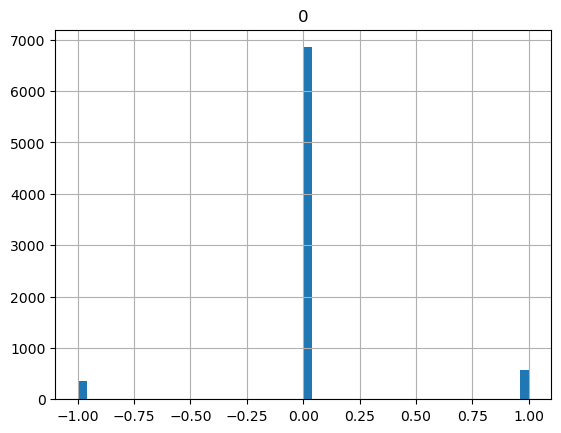

In [53]:
(unbert_aug_mrr - unbert_original_mrr).hist(bins=50)

In [54]:
((unbert_aug_mrr - unbert_original_mrr) > 0.1).sum()

0    573
dtype: int64

In [55]:
unbert_aug_mrr.loc[(unbert_aug_mrr.values - unbert_original_mrr.values) > 0.5]

,0
21,1
56,1
64,1
68,1
73,1
...,...
7705,1
7712,1
7723,1
7755,1


In [56]:
behaviors_cols = ["Impression ID","User ID","Time","History","Impressions" ]
news_cols = ["News ID","Title","Category","Abstract"]


In [57]:
interactions_hard_test = pd.read_table("data/test_hard/behaviors.tsv",names=behaviors_cols)
#interactions_hard_test = pd.read_table("",names=behaviors_cols)

In [58]:
interactions_hard_test.head()

,Impression ID,User ID,Time,History,Impressions
0,6,U69606,11/15/2019 1:24:44 PM,N19591 N53033 N54088 N34140 N37394,N11390-0 N24802-1 N29091-0
1,10,U77860,11/15/2019 3:52:43 PM,N55829 N3909 N18459 N59704 N9146 N33096 N39081,N20764-0 N24802-1 N28640-1 N29091-0 N45057-0 N...
2,11,U24918,11/15/2019 12:55:33 PM,N10792 N63241 N49745 N61103 N12907 N2783 N1735...,N11390-0 N17405-0 N24802-1 N2716-0 N29091-0 N3...
3,12,U50227,11/15/2019 12:46:28 PM,N51630 N55951 N12098 N33922 N45794 N17559 N478...,N11390-1 N12446-0 N21681-0 N24802-1 N26572-0 N...
4,34,U40099,11/15/2019 4:07:35 PM,N9317 N48840,N20764-0 N24802-0 N28640-0 N29091-0 N52492-1 N...


In [59]:
len(interactions_hard_test)

7793

In [60]:
(interactions_hard_test['Impressions'].str.contains("-1") & interactions_hard_test['Impressions'].str.contains("-0")).sum()

7786

In [61]:
pred_aug['impression_id'].tail()

165301    7792
165302    7792
165303    7792
165304    7792
165305    7792
Name: impression_id, dtype: int64

In [62]:
pred_aug['impression_id'].head()

0    0
1    0
2    0
3    1
4    1
Name: impression_id, dtype: int64

In [63]:
pred_aug.groupby('impression_id')['pred'].apply(list)

impression_id
0       [0.284343957901001, 0.20031163096427917, 0.121...
1       [0.17401766777038574, 0.20031163096427917, 0.1...
2       [0.284343957901001, 0.2656143307685852, 0.2003...
3       [0.284343957901001, 0.12425016611814499, 0.164...
4       [0.17401766777038574, 0.20031163096427917, 0.1...
                              ...                        
7788    [0.30003806948661804, 0.1693427562713623, 0.14...
7789    [0.13559886813163757, 0.24000981450080872, 0.0...
7790    [0.284343957901001, 0.1722523421049118, 0.1649...
7791    [0.284343957901001, 0.20031163096427917, 0.121...
7792    [0.17571096122264862, 0.05991477891802788, 0.2...
Name: pred, Length: 7786, dtype: object

In [64]:
interactions_hard_test = interactions_hard_test.loc[(interactions_hard_test['Impressions'].str.contains("-1") & interactions_hard_test['Impressions'].str.contains("-0"))]

In [65]:
interactions_hard_test['pred_aug'] = pred_aug.groupby('impression_id')['pred'].apply(list)
interactions_hard_test['pred_or'] = pred_or.groupby('impression_id')['pred'].apply(list)

In [66]:
((unbert_aug_mrr.values - unbert_original_mrr.values) > 0.1).sum()

573

In [67]:
(unbert_aug_mrr.loc[(unbert_aug_mrr.values - unbert_original_mrr.values) > 0.1]).sum()

0    573
dtype: int64

In [68]:
interactions_hard_test_mrrchange = interactions_hard_test.iloc[unbert_aug_mrr.loc[(unbert_aug_mrr.values - unbert_original_mrr.values) > 0.1].index]

In [69]:
len(unbert_aug_mrr)

7786

In [70]:
len(interactions_hard_test)

7786

In [71]:
len(interactions_hard_test_mrrchange )

573

In [72]:
unbert_aug_mrr.tail()

,0
7781,0
7782,1
7783,0
7784,1
7785,0


In [73]:
interactions_hard_test.tail()

,Impression ID,User ID,Time,History,Impressions,pred_aug,pred_or
7788,73091,U29054,11/15/2019 11:00:09 AM,N35710,N13261-0 N13408-0 N13916-0 N14266-0 N14637-0 N...,"[0.30003806948661804, 0.1693427562713623, 0.14...","[0.7222527861595154, 0.6588578224182129, 0.606..."
7789,73106,U1339,11/15/2019 7:29:37 AM,N39421 N55148 N49745 N3863 N12907 N65169 N1059...,N13408-0 N22731-0 N26572-0 N2852-0 N36779-0 N5...,"[0.13559886813163757, 0.24000981450080872, 0.0...","[0.5951701998710632, 0.7566908597946167, 0.454..."
7790,73145,U92886,11/15/2019 1:49:17 PM,N35450 N31801 N14617 N18656 N64531 N34040 N123...,N11390-0 N21171-0 N21681-0 N24802-0 N27057-0 N...,"[0.284343957901001, 0.1722523421049118, 0.1649...","[0.6620059013366699, 0.6084000468254089, 0.576..."
7791,73149,U56193,11/15/2019 1:11:26 PM,N28257,N11390-1 N24802-0 N29091-0,"[0.284343957901001, 0.20031163096427917, 0.121...","[0.6620059609413147, 0.6939311027526855, 0.626..."
7792,73150,U16799,11/15/2019 3:37:06 PM,N42078 N46845,N10142-0 N10885-0 N11390-0 N15738-0 N16120-0 N...,"[0.17571096122264862, 0.05991477891802788, 0.2...","[0.6134313941001892, 0.400835782289505, 0.6620..."


In [74]:
rare_events_df = pd.read_pickle('../classified_like_impactful_events_hard_test_from_dev.pkl')
#rare_events_df = pd.read_pickle('../classified_like_impactful_events.pkl')

In [75]:
rare_events_df.head()

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities,full_text,rare_event_score
19984,N13697,finance,markets,Elizabeth Warren alarmed about turmoil in over...,Elizabeth Warren fears Wall Street will use th...,https://assets.msn.com/labs/mind/AAJbhik.html,[],"[{""Label"": ""Wall Street"", ""Type"": ""S"", ""Wikida...",Elizabeth Warren alarmed about turmoil in over...,0.002246
40107,N42950,finance,finance-companies,Climate change looms over giant Saudi energy IPO,As investors weigh up the value of Saudi energ...,https://assets.msn.com/labs/mind/BBWMngi.html,"[{""Label"": ""Initial public offering"", ""Type"": ...","[{""Label"": ""Initial public offering"", ""Type"": ...",Climate change looms over giant Saudi energy I...,0.004840
20381,N12932,finance,markets,How the Trade War and a Changing China Are Roi...,The trade war and China's economic shift made ...,https://assets.msn.com/labs/mind/AAJByee.html,"[{""Label"": ""China\u2013United States trade war...","[{""Label"": ""United Nations Conference on Trade...",How the Trade War and a Changing China Are Roi...,0.005048
24098,N59132,news,newsscienceandtechnology,Faraday Future founder files for Chapter 11 ba...,Faraday Future founder Jia Yueting has filed f...,https://assets.msn.com/labs/mind/AAILMOY.html,"[{""Label"": ""Faraday Future"", ""Type"": ""O"", ""Wik...","[{""Label"": ""Faraday Future"", ""Type"": ""O"", ""Wik...",Faraday Future founder files for Chapter 11 ba...,0.005670
24806,N24238,finance,finance-real-estate,"Climate change will break the housing market, ...",Risk to the housing market from underestimated...,https://assets.msn.com/labs/mind/AAJHCCi.html,[],[],"Climate change will break the housing market, ...",0.008290


In [76]:
interactions_hard_test['Impressions'].apply(lambda x: any( [rare_news in x for rare_news in rare_events_df['News ID'].values] )).sum()

7786

In [77]:
interactions_hard_test_mrrchange['Impressions'].apply(lambda x: any( [rare_news in x for rare_news in rare_events_df['News ID'].values] ))

21      True
56      True
64      True
68      True
73      True
        ... 
7712    True
7719    True
7730    True
7762    True
7772    True
Name: Impressions, Length: 573, dtype: bool

In [78]:
rare_events_df['News ID'].values

array(['N13697', 'N42950', 'N12932', 'N59132', 'N24238', 'N38660',
       'N65103', 'N37809', 'N46380', 'N17720', 'N46281', 'N26286',
       'N54168', 'N33429', 'N38712', 'N57902', 'N6994', 'N9829', 'N12682',
       'N34134', 'N3059', 'N40833', 'N6347', 'N18753', 'N42026', 'N11447',
       'N29639', 'N25292', 'N9858', 'N7617', 'N48340', 'N35801', 'N45978',
       'N45332', 'N10662', 'N38578', 'N63781', 'N2085', 'N29091',
       'N35119', 'N42445', 'N30465', 'N58412', 'N54628', 'N59283',
       'N41621', 'N39649', 'N21865', 'N43984', 'N56245', 'N38069',
       'N12206', 'N23335', 'N51930', 'N53369', 'N6245', 'N14908',
       'N11971', 'N29746', 'N1454', 'N46519', 'N21527', 'N62661',
       'N16655', 'N3576', 'N1440', 'N27743', 'N22462', 'N42203', 'N52206',
       'N18539', 'N45702', 'N5732', 'N28563', 'N34242'], dtype=object)

In [83]:
(interactions_hard_test_mrrchange['Impressions'].str.split().apply(len) == interactions_hard_test_mrrchange["pred_aug"].apply(len)).all()

True

In [80]:
interactions_hard_test_mrrchange.loc[interactions_hard_test_mrrchange['Impressions'].apply(lambda x: any( [rare_news+"-1" in x for rare_news in rare_events_df['News ID'].values] ))]

,Impression ID,User ID,Time,History,Impressions,pred_aug,pred_or
1680,15816,U66598,11/15/2019 4:06:10 AM,N47525 N55798 N48038 N16617 N39009 N31820 N110...,N10423-0 N13347-0 N15951-0 N16854-0 N19536-0 N...,"[0.08659356832504272, 0.18345335125923157, 0.0...","[0.5624561905860901, 0.6171371936798096, 0.649..."
5398,50621,U70637,11/15/2019 7:44:45 AM,N60402 N18164 N55749 N48158 N63123 N38933 N504...,N12682-1 N13408-0 N26063-0 N27057-0 N27738-0 N...,"[0.17899809777736664, 0.1693427562713623, 0.11...","[0.6067030429840088, 0.6588578224182129, 0.548..."
5485,51296,U83032,11/15/2019 6:23:36 AM,N9798 N13925 N18526 N17511 N3130 N32852 N3187,N12446-0 N13408-0 N13556-0 N14637-0 N16120-0 N...,"[0.12425016611814499, 0.1693427562713623, 0.11...","[0.651755154132843, 0.6588578224182129, 0.5628..."
6264,58559,U5506,11/15/2019 1:58:52 PM,N43028 N17811 N18873 N57888 N38256 N47020 N499...,N11390-0 N16396-0 N21171-0 N24802-0 N27057-0 N...,"[0.284343957901001, 0.19302454590797424, 0.172...","[0.6620059013366699, 0.6908576488494873, 0.608..."


In [81]:
interactions_hard_test_mrrchange.loc[interactions_hard_test_mrrchange['Impressions'].apply(lambda x: any( [rare_news+"-1" in x for rare_news in rare_events_df['News ID'].values] ) & ('N29091-1' not in x) ) ]

,Impression ID,User ID,Time,History,Impressions,pred_aug,pred_or
1680,15816,U66598,11/15/2019 4:06:10 AM,N47525 N55798 N48038 N16617 N39009 N31820 N110...,N10423-0 N13347-0 N15951-0 N16854-0 N19536-0 N...,"[0.08659356832504272, 0.18345335125923157, 0.0...","[0.5624561905860901, 0.6171371936798096, 0.649..."
5398,50621,U70637,11/15/2019 7:44:45 AM,N60402 N18164 N55749 N48158 N63123 N38933 N504...,N12682-1 N13408-0 N26063-0 N27057-0 N27738-0 N...,"[0.17899809777736664, 0.1693427562713623, 0.11...","[0.6067030429840088, 0.6588578224182129, 0.548..."
5485,51296,U83032,11/15/2019 6:23:36 AM,N9798 N13925 N18526 N17511 N3130 N32852 N3187,N12446-0 N13408-0 N13556-0 N14637-0 N16120-0 N...,"[0.12425016611814499, 0.1693427562713623, 0.11...","[0.651755154132843, 0.6588578224182129, 0.5628..."


In [82]:
N29091-1

NameError: name 'N29091' is not defined

In [507]:
interactions_hard_test_mrrchange['Impressions'].apply(lambda x: any( [rare_news+"-0" in x for rare_news in rare_events_df['News ID'].values] ))

21      False
56       True
64       True
68       True
73       True
        ...  
7712     True
7719     True
7730     True
7762     True
7772     True
Name: Impressions, Length: 573, dtype: bool

In [508]:
chosen_int = interactions_hard_test_mrrchange.loc[4389]

KeyError: 4389

In [509]:
chosen_int

Impression ID                                                50621
User ID                                                     U70637
Time                                         11/15/2019 7:44:45 AM
History          N60402 N18164 N55749 N48158 N63123 N38933 N504...
Impressions      N12682-1 N13408-0 N26063-0 N27057-0 N27738-0 N...
pred_aug         [0.17899809777736664, 0.1693427562713623, 0.11...
pred_or          [0.6067030429840088, 0.6588578224182129, 0.548...
Name: 5398, dtype: object

In [210]:
sorted(zip(chosen_int["Impressions"].split(),chosen_int['pred_aug']),key=lambda x:x[1],reverse=True)

[('N11681-0', 0.37168172001838684),
 ('N47020-0', 0.33332568407058716),
 ('N7993-0', 0.2999560534954071),
 ('N27738-0', 0.25004735589027405),
 ('N1477-0', 0.2449999451637268),
 ('N6471-0', 0.22464829683303833),
 ('N49038-0', 0.22367946803569794),
 ('N26305-0', 0.22175580263137817),
 ('N36779-0', 0.21434205770492554),
 ('N1597-0', 0.21265587210655212),
 ('N52850-0', 0.20444510877132416),
 ('N45289-0', 0.19699835777282715),
 ('N28589-0', 0.19695551693439484),
 ('N57462-0', 0.1830132156610489),
 ('N47572-0', 0.18172119557857513),
 ('N12682-1', 0.17899809777736664),
 ('N15518-0', 0.17864741384983063),
 ('N34633-0', 0.1740388572216034),
 ('N13408-0', 0.1693427562713623),
 ('N56458-0', 0.16656149923801422),
 ('N4476-0', 0.16473524272441864),
 ('N436-0', 0.16433085501194),
 ('N11092-0', 0.16011680662631989),
 ('N46452-0', 0.14962752163410187),
 ('N41497-0', 0.14399710297584534),
 ('N33176-0', 0.14337202906608582),
 ('N18449-0', 0.14147530496120453),
 ('N2852-0', 0.1407688707113266),
 ('N53283

In [211]:
sorted(zip(chosen_int["Impressions"].split(),chosen_int['pred_or']),key=lambda x:x[1],reverse=True)

[('N47020-0', 0.8242606520652771),
 ('N11681-0', 0.7941903471946716),
 ('N7993-0', 0.7671888470649719),
 ('N49038-0', 0.7536293864250183),
 ('N1477-0', 0.7432376742362976),
 ('N52850-0', 0.7268804907798767),
 ('N26305-0', 0.724610447883606),
 ('N47572-0', 0.6891971230506897),
 ('N27738-0', 0.6845247149467468),
 ('N436-0', 0.6739627718925476),
 ('N6471-0', 0.6725689172744751),
 ('N15518-0', 0.6696509718894958),
 ('N28589-0', 0.6683505177497864),
 ('N36779-0', 0.6652841567993164),
 ('N56458-0', 0.6623077392578125),
 ('N17513-0', 0.6607984304428101),
 ('N1597-0', 0.6605821847915649),
 ('N13408-0', 0.6588578224182129),
 ('N45289-0', 0.6583585143089294),
 ('N11092-0', 0.6439637541770935),
 ('N26572-0', 0.6438857913017273),
 ('N53283-0', 0.6432585120201111),
 ('N46452-0', 0.6296252608299255),
 ('N2852-0', 0.6116254329681396),
 ('N12682-1', 0.6067030429840088),
 ('N50775-0', 0.5992249846458435),
 ('N57462-0', 0.5971130132675171),
 ('N62393-0', 0.5828732252120972),
 ('N4476-0', 0.5822414755821

In [238]:
chosen_int = interactions_hard_test_mrrchange.loc[7240]

In [239]:
chosen_int

Impression ID                                                67846
User ID                                                     U18693
Time                                        11/15/2019 12:19:28 PM
History          N8298 N1570 N14845 N14845 N12173 N59516 N42750...
Impressions      N11092-0 N21312-0 N22575-0 N23444-0 N2700-0 N2...
pred_aug         [0.29335829615592957, 0.1930699199438095, 0.06...
pred_or          [0.8477369546890259, 0.665494441986084, 0.3093...
Name: 7240, dtype: object

In [240]:
chosen_int['Impressions']

'N11092-0 N21312-0 N22575-0 N23444-0 N2700-0 N27057-0 N27552-0 N30465-1 N33176-0 N37055-0 N37233-0 N41541-0 N47572-0 N48490-0 N5051-0 N50670-0 N5507-0 N56434-0 N57085-0 N60939-0 N61699-0 N6388-0 N64264-0 N64724-0'

In [244]:
rare_events_df.loc[rare_events_df['News ID'] == "N30465",['Title','Abstract']].values

array([['FDA Poised to Drop the Hammer on Dollar Tree',
        "The FDA has sent a warning letter to Dollar Tree detailing the agency's suggested corrective actions to make sure the company stops importing adulterated drug products."]],
      dtype=object)

In [267]:
chosen_int = interactions_hard_test_mrrchange.loc[5733]

In [268]:
chosen_int['Impressions']

'N12446-0 N13408-0 N13556-0 N13854-0 N14056-0 N14266-0 N14507-0 N1597-0 N16120-0 N18971-0 N23629-0 N26063-0 N26305-0 N27738-0 N28716-0 N3168-0 N3174-0 N32288-0 N33397-0 N34641-0 N36779-0 N36786-0 N37233-0 N43277-0 N4476-0 N45289-0 N45319-0 N46452-0 N49712-0 N49872-0 N5051-0 N52104-0 N53283-0 N53754-0 N55712-0 N57007-0 N58612-0 N60747-0 N60939-0 N63415-0 N6388-0 N6471-0 N64954-0 N6994-1 N7993-0'

In [270]:
rare_events_df.loc[rare_events_df['News ID'] == "N6994",['Title','Abstract']].values

array([["Automakers around the world await Trump's tariff decision",
        'Automakers around the world are awaiting a decision from President Donald Trump on whether he will impose up to 25% tariffs on U.S. car and auto part imports after a 180-day review period elapsed this week.']],
      dtype=object)

In [271]:
sorted(zip(chosen_int["Impressions"].split(),chosen_int['pred_aug']),key=lambda x:x[1],reverse=True)

[('N63415-0', 0.34813496470451355),
 ('N16120-0', 0.3220510184764862),
 ('N14266-0', 0.3060491979122162),
 ('N7993-0', 0.2999560534954071),
 ('N34641-0', 0.2868587374687195),
 ('N5051-0', 0.2816830575466156),
 ('N23629-0', 0.26313406229019165),
 ('N27738-0', 0.25004735589027405),
 ('N6471-0', 0.22464829683303833),
 ('N26305-0', 0.22175580263137817),
 ('N49712-0', 0.21567758917808533),
 ('N36779-0', 0.21434205770492554),
 ('N1597-0', 0.21265587210655212),
 ('N45289-0', 0.19699835777282715),
 ('N33397-0', 0.19568651914596558),
 ('N13408-0', 0.1693427562713623),
 ('N4476-0', 0.16473524272441864),
 ('N46452-0', 0.14962752163410187),
 ('N53754-0', 0.148420512676239),
 ('N53283-0', 0.1402224749326706),
 ('N14056-0', 0.13814570009708405),
 ('N32288-0', 0.13470952212810516),
 ('N58612-0', 0.13408777117729187),
 ('N64954-0', 0.13376234471797943),
 ('N3174-0', 0.1327439397573471),
 ('N60939-0', 0.13207855820655823),
 ('N45319-0', 0.12853720784187317),
 ('N12446-0', 0.12425016611814499),
 ('N2606

In [272]:
sorted(zip(chosen_int["Impressions"].split(),chosen_int['pred_or']),key=lambda x:x[1],reverse=True)

[('N63415-0', 0.824914813041687),
 ('N16120-0', 0.7938815951347351),
 ('N5051-0', 0.7855786085128784),
 ('N7993-0', 0.7671888470649719),
 ('N14266-0', 0.7612680196762085),
 ('N49712-0', 0.7310102581977844),
 ('N26305-0', 0.724610447883606),
 ('N27738-0', 0.6845247149467468),
 ('N6471-0', 0.6725689172744751),
 ('N53754-0', 0.6672472953796387),
 ('N36779-0', 0.6652841567993164),
 ('N14056-0', 0.6619070768356323),
 ('N1597-0', 0.6605821847915649),
 ('N13408-0', 0.6588578224182129),
 ('N45289-0', 0.6583585143089294),
 ('N58612-0', 0.6563382744789124),
 ('N49872-0', 0.656156599521637),
 ('N12446-0', 0.651755154132843),
 ('N34641-0', 0.6498042345046997),
 ('N53283-0', 0.6432585120201111),
 ('N23629-0', 0.6363604068756104),
 ('N46452-0', 0.6296252608299255),
 ('N13854-0', 0.6043474078178406),
 ('N45319-0', 0.5928237438201904),
 ('N33397-0', 0.5856683850288391),
 ('N4476-0', 0.5822414755821228),
 ('N6994-1', 0.579377293586731),
 ('N18971-0', 0.5632904171943665),
 ('N13556-0', 0.562811315059661

In [273]:
chosen_int = interactions_hard_test_mrrchange.loc[7146]

In [274]:
chosen_int['Impressions']

'N12446-0 N14721-0 N16120-0 N23629-0 N2659-0 N27057-0 N36779-1 N37233-0 N42950-1 N47195-0 N50719-0 N52907-0 N53754-0'

In [280]:
rare_events_df.loc[rare_events_df['News ID'] == "N42950",['Title','Abstract']].values

array([['Climate change looms over giant Saudi energy IPO',
        'As investors weigh up the value of Saudi energy colossus Aramco ahead of its IPO next month, the global drive to contain climate change and waning demand for fossil fuels are seen as key risks. "There\'s no doubt that environmental, social and governance risks will factor in the calculations of investors looking at the Saudi Aramco IPO," said Torbjorn Soltvedt from Verisk Maplecroft, a UK-based strategic consulting firm.']],
      dtype=object)

In [276]:
sorted(zip(chosen_int["Impressions"].split(),chosen_int['pred_aug']),key=lambda x:x[1],reverse=True)

[('N16120-0', 0.3220510184764862),
 ('N23629-0', 0.26313406229019165),
 ('N36779-1', 0.21434205770492554),
 ('N52907-0', 0.19784897565841675),
 ('N14721-0', 0.18407298624515533),
 ('N53754-0', 0.148420512676239),
 ('N2659-0', 0.1403486728668213),
 ('N27057-0', 0.1272057294845581),
 ('N12446-0', 0.12425016611814499),
 ('N37233-0', 0.09768649935722351),
 ('N50719-0', 0.08429981023073196),
 ('N47195-0', 0.08288898319005966),
 ('N42950-1', 0.07800927013158798)]

In [277]:
sorted(zip(chosen_int["Impressions"].split(),chosen_int['pred_or']),key=lambda x:x[1],reverse=True)

[('N16120-0', 0.7938815951347351),
 ('N14721-0', 0.6853628158569336),
 ('N52907-0', 0.6727432608604431),
 ('N53754-0', 0.6672472953796387),
 ('N36779-1', 0.6652841567993164),
 ('N12446-0', 0.651755154132843),
 ('N23629-0', 0.6363604068756104),
 ('N2659-0', 0.6171721816062927),
 ('N27057-0', 0.590977132320404),
 ('N37233-0', 0.5230104327201843),
 ('N42950-1', 0.4568440914154053),
 ('N50719-0', 0.45626115798950195),
 ('N47195-0', 0.2901085913181305)]

In [283]:
news.loc[news['News ID']=='N36779']

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
14307,N36779,news,newsus,South Carolina teen gets life in prison for de...,"Jesse Osborne, the teenager responsible for a ...",https://assets.msn.com/labs/mind/BBWMe6C.html,"[{""Label"": ""South Carolina"", ""Type"": ""G"", ""Wik...","[{""Label"": ""Townville Elementary School shooti..."


In [281]:
news.columns

Index(['News ID', 'Category', 'SubCategory', 'Title', 'Abstract', 'URL',
       'Title Entities', 'Abstract Entities'],
      dtype='object')

In [518]:
chosen_int = interactions_hard_test_mrrchange.loc[5398]

In [519]:
chosen_int['Impressions']

'N12682-1 N13408-0 N26063-0 N27057-0 N27738-0 N28716-0 N29393-0 N3174-0 N36786-0 N37458-0 N47572-0 N53283-0 N53754-0 N58612-0 N6994-0'

In [520]:
rare_events_df.loc[rare_events_df['News ID'] == "N12682",['Title','Abstract']].values

array([['This is what the trade war looks like in bourbon country',
        "After Europe retaliated with tariffs on Kentucky bourbon in response to President Donald Trump's trade war, the James E. Pepper distillery in Lexington so far this year has suffered a more than 20% sales decline internationally."]],
      dtype=object)

In [521]:
sorted(zip(chosen_int["Impressions"].split(),chosen_int['pred_aug']),key=lambda x:x[1],reverse=True)

[('N27738-0', 0.25004735589027405),
 ('N29393-0', 0.18914149701595306),
 ('N47572-0', 0.18172119557857513),
 ('N12682-1', 0.17899809777736664),
 ('N13408-0', 0.1693427562713623),
 ('N53754-0', 0.148420512676239),
 ('N37458-0', 0.14777866005897522),
 ('N53283-0', 0.1402224749326706),
 ('N58612-0', 0.13408777117729187),
 ('N3174-0', 0.1327439397573471),
 ('N27057-0', 0.1272057294845581),
 ('N26063-0', 0.11868644505739212),
 ('N36786-0', 0.10800226777791977),
 ('N28716-0', 0.08347739279270172),
 ('N6994-0', 0.06109355017542839)]

In [522]:
sorted(zip(chosen_int["Impressions"].split(),chosen_int['pred_or']),key=lambda x:x[1],reverse=True)

[('N47572-0', 0.6891971230506897),
 ('N27738-0', 0.6845247149467468),
 ('N53754-0', 0.6672472953796387),
 ('N13408-0', 0.6588578224182129),
 ('N58612-0', 0.6563382744789124),
 ('N29393-0', 0.644573450088501),
 ('N53283-0', 0.6432585120201111),
 ('N37458-0', 0.6264739632606506),
 ('N12682-1', 0.6067030429840088),
 ('N27057-0', 0.590977132320404),
 ('N6994-0', 0.579377293586731),
 ('N26063-0', 0.5484316945075989),
 ('N3174-0', 0.5196162462234497),
 ('N28716-0', 0.5102424621582031),
 ('N36786-0', 0.48203325271606445)]

In [523]:
for news_id,_ in sorted(zip(chosen_int["Impressions"].split(),chosen_int['pred_or']),key=lambda x:x[1],reverse=True):
    print(news.loc[news['News ID']==news_id.split("-")[0],['Title','Abstract']])

                                                   Title  \
39777  A Trump Tax Break To Help The Poor Went To a R...   

                                                Abstract  
39777  The Trump tax law gave governors the authority...  
                                                   Title  \
35527  House to hear from US official who said he ove...   

                                                Abstract  
35527  In a closed-door deposition, House investigato...  
                                                   Title  \
40032  Trump's Washington hotel has fallen behind com...   

                                                Abstract  
40032  A real estate firm hired by Trump's company di...  
                                                   Title  \
37738  Raise Billions From Billionaires? Tax Experts ...   

                                                Abstract  
37738  One of the signature initiatives of Elizabeth ...  
                                            

In [524]:
for news_id in chosen_int["History"].split():
    print(news.loc[news['News ID']==news_id.split("-")[0],['Title','Abstract']])

                                                   Title  \
26553  Wine, cheese and 22 more things that are about...   

                                                Abstract  
26553  With U.S. tariffs on European imports set to s...  
                                                   Title  \
17818  Scotch whisky distributors face US tariffs aft...   

                                                Abstract  
17818  Whisky makes up 12.4% of all exports to the US...  
                                                  Title  \
2883  Why farmers might be disappointed with China deal   

                                               Abstract  
2883  Although President Trump has touted the pact a...  
                                                   Title  \
11261  Navy veteran's family plans to sue VA over sus...   

                                                Abstract  
11261  The family of an 87-year-old U.S. Navy veteran...  
                                                

In [525]:
news.head()

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N18955,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


In [526]:
chosen_int = interactions_hard_test_mrrchange.loc[5485]

In [527]:
chosen_int['Impressions']

'N12446-0 N13408-0 N13556-0 N14637-0 N16120-0 N17672-0 N18895-0 N22690-0 N3168-0 N33397-0 N36786-0 N37233-0 N42233-0 N43646-1 N49712-0 N53283-0 N53754-0 N57007-0 N60939-0 N65103-1'

In [534]:
rare_events_df.loc[rare_events_df['News ID'] == "N65103",['Title','Abstract']].values

array([["Deere workers grapple with fallout from Trump's trade war",
        "Deere workers grapple with fallout from Trump's trade war"]],
      dtype=object)

In [529]:
sorted(zip(chosen_int["Impressions"].split(),chosen_int['pred_aug']),key=lambda x:x[1],reverse=True)

[('N16120-0', 0.3220510184764862),
 ('N18895-0', 0.21624664962291718),
 ('N49712-0', 0.21567758917808533),
 ('N33397-0', 0.19568651914596558),
 ('N65103-1', 0.17559780180454254),
 ('N13408-0', 0.1693427562713623),
 ('N42233-0', 0.1517842561006546),
 ('N53754-0', 0.148420512676239),
 ('N43646-1', 0.14257153868675232),
 ('N53283-0', 0.1402224749326706),
 ('N60939-0', 0.13207855820655823),
 ('N12446-0', 0.12425016611814499),
 ('N13556-0', 0.11518781632184982),
 ('N22690-0', 0.10958965122699738),
 ('N36786-0', 0.10800226777791977),
 ('N14637-0', 0.10683039575815201),
 ('N3168-0', 0.10519365221261978),
 ('N37233-0', 0.09768649935722351),
 ('N17672-0', 0.09591763466596603),
 ('N57007-0', 0.08438815921545029)]

In [530]:
sorted(zip(chosen_int["Impressions"].split(),chosen_int['pred_or']),key=lambda x:x[1],reverse=True)

[('N16120-0', 0.7938815951347351),
 ('N49712-0', 0.7310102581977844),
 ('N18895-0', 0.7233477830886841),
 ('N53754-0', 0.6672472953796387),
 ('N13408-0', 0.6588578224182129),
 ('N42233-0', 0.6521636843681335),
 ('N12446-0', 0.651755154132843),
 ('N65103-1', 0.6446247100830078),
 ('N53283-0', 0.6432585120201111),
 ('N43646-1', 0.5950032472610474),
 ('N33397-0', 0.5856683850288391),
 ('N13556-0', 0.5628113150596619),
 ('N37233-0', 0.5230104327201843),
 ('N60939-0', 0.5182258486747742),
 ('N17672-0', 0.5016310811042786),
 ('N57007-0', 0.49335014820098877),
 ('N36786-0', 0.48203325271606445),
 ('N22690-0', 0.47602030634880066),
 ('N14637-0', 0.4070439040660858),
 ('N3168-0', 0.35795196890830994)]

In [536]:
for news_id,_ in sorted(zip(chosen_int["Impressions"].split(),chosen_int['pred_aug']),key=lambda x:x[1],reverse=True):
    print(news.loc[news['News ID']==news_id.split("-")[0],['Title','Abstract']].values)

[["Stephanie Parze's Car Is at Home. So Is Her Phone. But She's Missing."
  "Her car was in the driveway. Her phone was on the couch. Her dog was running around. Everything about Stephanie Parze's home in New Jersey, her father says, seemed undisturbed   except that she was not there. The last time her mother saw Ms. Parze, they had kissed goodbye after a night out with friends and family, according to a report."]]
[["White House releases summary of Trump's first call with Ukraine's Zelensky"
  "The White House has released a document summarizing President Donald Trump's first phone call with newly elected Ukrainian President Volodymyr Zelensky in April of this year."]]
[['Wisconsin bus driver saves children wandering in snow, as deadly Arctic air mass grips US'
  'As bitter cold took hold across the Midwest earlier this week, a sharp-eyed bus driver in Wisconsin was credited with helping rescue two children who were very underdressed for the weather conditions.']]
[['5 arrested in con

In [539]:
for news_id,_ in sorted(zip(chosen_int["Impressions"].split(),chosen_int['pred_or']),key=lambda x:x[1],reverse=True):
    print(news.loc[news['News ID']==news_id.split("-")[0],['Title','Abstract']].values, news_id in rare_events_df['News ID'])

[["Stephanie Parze's Car Is at Home. So Is Her Phone. But She's Missing."
  "Her car was in the driveway. Her phone was on the couch. Her dog was running around. Everything about Stephanie Parze's home in New Jersey, her father says, seemed undisturbed   except that she was not there. The last time her mother saw Ms. Parze, they had kissed goodbye after a night out with friends and family, according to a report."]] False
[['Wisconsin bus driver saves children wandering in snow, as deadly Arctic air mass grips US'
  'As bitter cold took hold across the Midwest earlier this week, a sharp-eyed bus driver in Wisconsin was credited with helping rescue two children who were very underdressed for the weather conditions.']] False
[["White House releases summary of Trump's first call with Ukraine's Zelensky"
  "The White House has released a document summarizing President Donald Trump's first phone call with newly elected Ukrainian President Volodymyr Zelensky in April of this year."]] False
[[

In [537]:
for news_id in chosen_int["History"].split():
    print(news.loc[news['News ID']==news_id.split("-")[0],['Title','Abstract']].values)

[['Missing West Point cadet found dead, officials say'
  'A U.S. Military Academy cadet who vanished last week has been found dead, officials said Wednesday.']]
[['Northern Michigan father of 7 wins $80M Powerball jackpot'
  'Phillip Chippewa, 54, of Suttons Bay matched the winning Powerball numbers drawn Sept. 21.']]
[['41 American troops identified so far from remains returned by North Korea'
  'Dozens of American soldiers have been identified so far from the 55 boxes of remains and artifacts sent back home from North Korea last year after a historic meeting between Hermit Kingdom leader Kim Jong Un and President Trump, Defense Department officials announced Friday.']]
[['In Pictures: ISIS leader Abu Bakr al-Baghdadi killed in US raid' nan]]
[['Ex-CIA spy flees from Italy to U.S. fearing for her safety: paper'
  'A former U.S. spy, pardoned by Italy in connection with the CIA kidnapping of a terrorism suspect in Milan, has fled from Italy to the United States fearing for her safety, 

In [ ]:
H

[['Ex-CIA spy flees from Italy to U.S. fearing for her safety: paper'
  'A former U.S. spy, pardoned by Italy in connection with the CIA kidnapping of a terrorism suspect in Milan, has fled from Italy to the United States fearing for her safety, Italian newspaper Il Corriere della Sera on Sunday quoted her as saying.']]
[['Nearly $400M worth of cocaine and marijuana intercepted by US Coast Guard'
  'The U.S. Coast Guard announced that it seized nearly $367 million of cocaine and about 11,000 pounds of marijuana worth an estimated $10.1 million at a Florida port.']]
[['CPD Supt. Eddie Johnson To Present Police Budget Amid Retirement Rumors'
  "Monday's hearing is part of Lightfoot's ongoing budget hearings to dig Chicago out of debt."]]



Deere workers grapple with fallout from Trump's trade war"
  "Deere workers grapple with fallout from Trump's trade war"]]

["Raise Billions From Billionaires? Tax Experts Say It's Not That Simple"
  "One of the signature initiatives of Elizabeth Warren's presidential campaign is a wealth tax that, she says, would pay for many of the programs she proposes."]]
[['After four years of controversy, embattled Palatine-based school district grants transgender students unrestricted locker room access'
  'A northwest suburban high school district in the national spotlight on transgender rights is granting students unrestricted access to locker rooms based on gender identity, a culmination of four years of heated debate. Palatine-based Township High School District 211\'s board of education on Thursday voted 5 to 2 in favor of the new policy, which states in part that students "shall be treated ...']]
[["Homeless woman living in SUV with dogs moves into apartment with community's help"
  'Two friends in suburn Philadelphia reached out to residents via the Nextdoor app to get food and housing for a former pharmacist with health issues living in an SUV.']]





[["Raise Billions From Billionaires? Tax Experts Say It's Not That Simple"
  "One of the signature initiatives of Elizabeth Warren's presidential campaign is a wealth tax that, she says, would pay for many of the programs she proposes."]]
[['After four years of controversy, embattled Palatine-based school district grants transgender students unrestricted locker room access'
  'A northwest suburban high school district in the national spotlight on transgender rights is granting students unrestricted access to locker rooms based on gender identity, a culmination of four years of heated debate. Palatine-based Township High School District 211\'s board of education on Thursday voted 5 to 2 in favor of the new policy, which states in part that students "shall be treated ...']]
[["Homeless woman living in SUV with dogs moves into apartment with community's help"
  'Two friends in suburn Philadelphia reached out to residents via the Nextdoor app to get food and housing for a former pharmacist with health issues living in an SUV.']]
[["Deere workers grapple with fallout from Trump's trade war"
  "Deere workers grapple with fallout from Trump's trade war"]]



In [ ]:
news.head()

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N18955,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


In [432]:
news.columns

Index(['News ID', 'Category', 'SubCategory', 'Title', 'Abstract', 'URL',
       'Title Entities', 'Abstract Entities'],
      dtype='object')

In [426]:
news.loc[news['News ID']=='N33297']

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
39878,N33297,Johnson opens door to subpoenaing whistleblowe...,news,Senate Homeland Security and Governmental Affa...,NaN,NaN,NaN,NaN


In [427]:
news.loc[news['News ID']=='N33297','Title'].values

array(["Senate Homeland Security and Governmental Affairs Committee Chairman Ron Johnson (R-Wis.) opened the door on Thursday to subpoenaing a cadre of top Republican targets as part of his panel's oversight work. Pressed if he would issue subpoenas for House Intelligence Committee Chairman Adam Schiff (D-Calif.), former Vice President Biden or his son Hunter Biden or the whistleblower at the center of the impeachment inquiry, Johnson stressed that he..."],
      dtype=object)

In [428]:
news.columns

Index(['News ID', 'Category', 'SubCategory', 'Title', 'Abstract', 'URL',
       'Title Entities', 'Abstract Entities'],
      dtype='object')

In [ ]:
3865

In [292]:
chosen_int = interactions_hard_test_mrrchange.loc[3865]

In [293]:
chosen_int['Impressions']

'N11681-0 N12146-0 N12703-0 N13408-0 N13556-0 N1597-0 N17672-0 N19685-0 N21571-0 N22975-0 N25664-0 N26063-0 N26918-0 N27057-0 N27738-0 N2852-0 N28716-0 N3168-0 N33486-0 N34633-0 N36779-0 N36786-0 N42950-0 N46862-0 N46917-0 N47576-0 N53283-0 N53630-0 N57007-0 N57085-0 N59876-0 N6051-0 N60747-0 N64744-0 N6477-0 N65103-1'

In [294]:
rare_events_df.loc[rare_events_df['News ID'] == "N42950",['Title','Abstract']].values

array([['Climate change looms over giant Saudi energy IPO',
        'As investors weigh up the value of Saudi energy colossus Aramco ahead of its IPO next month, the global drive to contain climate change and waning demand for fossil fuels are seen as key risks. "There\'s no doubt that environmental, social and governance risks will factor in the calculations of investors looking at the Saudi Aramco IPO," said Torbjorn Soltvedt from Verisk Maplecroft, a UK-based strategic consulting firm.']],
      dtype=object)

In [295]:
sorted(zip(chosen_int["Impressions"].split(),chosen_int['pred_aug']),key=lambda x:x[1],reverse=True)

[('N11681-0', 0.37168172001838684),
 ('N46917-0', 0.31525057554244995),
 ('N27738-0', 0.25004735589027405),
 ('N25664-0', 0.23727889358997345),
 ('N6477-0', 0.2211844027042389),
 ('N22975-0', 0.21877972781658173),
 ('N36779-0', 0.21434205770492554),
 ('N1597-0', 0.21265587210655212),
 ('N53630-0', 0.20128077268600464),
 ('N59876-0', 0.1875045746564865),
 ('N47576-0', 0.17672845721244812),
 ('N65103-1', 0.17559780180454254),
 ('N64744-0', 0.17405684292316437),
 ('N34633-0', 0.1740388572216034),
 ('N19685-0', 0.17385995388031006),
 ('N13408-0', 0.1693427562713623),
 ('N12146-0', 0.1646149605512619),
 ('N12703-0', 0.15629002451896667),
 ('N2852-0', 0.1407688707113266),
 ('N53283-0', 0.1402224749326706),
 ('N27057-0', 0.1272057294845581),
 ('N6051-0', 0.1250666081905365),
 ('N26063-0', 0.11868644505739212),
 ('N13556-0', 0.11518781632184982),
 ('N57085-0', 0.1128404438495636),
 ('N36786-0', 0.10800226777791977),
 ('N3168-0', 0.10519365221261978),
 ('N17672-0', 0.09591763466596603),
 ('N570

In [296]:
sorted(zip(chosen_int["Impressions"].split(),chosen_int['pred_or']),key=lambda x:x[1],reverse=True)

[('N46917-0', 0.8090400099754333),
 ('N11681-0', 0.7941903471946716),
 ('N6477-0', 0.7483832836151123),
 ('N22975-0', 0.7272791862487793),
 ('N19685-0', 0.7087116837501526),
 ('N27738-0', 0.6845247149467468),
 ('N47576-0', 0.6743916869163513),
 ('N36779-0', 0.6652841567993164),
 ('N64744-0', 0.6636412143707275),
 ('N1597-0', 0.6605821847915649),
 ('N13408-0', 0.6588578224182129),
 ('N59876-0', 0.6568911075592041),
 ('N65103-1', 0.6446247100830078),
 ('N53283-0', 0.6432585120201111),
 ('N25664-0', 0.6342641711235046),
 ('N2852-0', 0.6116254329681396),
 ('N12146-0', 0.5937843322753906),
 ('N53630-0', 0.5932064056396484),
 ('N27057-0', 0.590977132320404),
 ('N12703-0', 0.5882846117019653),
 ('N13556-0', 0.5628113150596619),
 ('N34633-0', 0.5619239211082458),
 ('N26063-0', 0.5484316945075989),
 ('N57085-0', 0.5335114002227783),
 ('N28716-0', 0.5102424621582031),
 ('N17672-0', 0.5016310811042786),
 ('N57007-0', 0.49335014820098877),
 ('N36786-0', 0.48203325271606445),
 ('N6051-0', 0.4801629

In [318]:
news.loc[news['News ID']=='N65103','Title'].values

array(["Deere workers grapple with fallout from Trump's trade war"],
      dtype=object)

In [299]:
news.columns

Index(['News ID', 'Category', 'SubCategory', 'Title', 'Abstract', 'URL',
       'Title Entities', 'Abstract Entities'],
      dtype='object')

In [262]:
chosen_int = interactions_hard_test_mrrchange.loc[4093]

In [263]:
chosen_int['Impressions']

'N11390-1 N21681-0 N24802-0 N29091-1 N3168-1 N37055-0 N55084-0'

In [265]:
rare_events_df.loc[rare_events_df['News ID'] == "N3168",['Title','Abstract']].values

array([], shape=(0, 2), dtype=object)

In [201]:
rare_events_df.loc[rare_events_df['News ID'] == "N12682"]

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities,full_text,rare_event_score
37378,N12682,finance,markets,This is what the trade war looks like in bourb...,After Europe retaliated with tariffs on Kentuc...,https://assets.msn.com/labs/mind/BBWLqIV.html,[],"[{""Label"": ""Lexington, Kentucky"", ""Type"": ""G"",...",This is what the trade war looks like in bourb...,0.031295


In [147]:
pred_aug.keys()

dict_keys(['pred', 'impression_id'])

In [172]:
pred_aug.loc[pred_aug['impression_id']==41191]

,pred,impression_id


In [150]:
pred_aug['impression_id']

[0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19

In [140]:
interactions_hard_test_mrrchange.loc[1956,'Impressions']

'N11390-0 N24802-0 N29091-1 N40875-0'

In [ ]:
interactions_hard_test_mrrchange.loc[1956,'Impressions']

In [89]:
rare_events_df.loc[rare_events_df['News ID'] == "N29091"]

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities,full_text,rare_event_score
38864,N29091,news,newspolitics,Federal Prosecutors Probe Giuliani's Links to ...,Federal prosecutors in New York are investigat...,https://assets.msn.com/labs/mind/BBWP2MO.html,[],"[{""Label"": ""Rudy Giuliani"", ""Type"": ""P"", ""Wiki...",Federal Prosecutors Probe Giuliani's Links to ...,0.107018


In [441]:
interactions_hard_test_mrrchange.loc[718,'Impressions']

'N11390-1 N27057-0 N28716-0 N30465-1 N3451-0 N41910-0 N45289-0 N47119-0 N4733-0 N55036-0 N5507-0 N58188-0 N7247-0'

In [439]:
interactions_hard_test_mrrchange.loc[6625,'Impressions']

KeyError: 6625

In [307]:
rare_events_df.loc[rare_events_df['News ID'] == "N12682"]

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities,full_text,rare_event_score
37378,N12682,finance,markets,This is what the trade war looks like in bourb...,After Europe retaliated with tariffs on Kentuc...,https://assets.msn.com/labs/mind/BBWLqIV.html,[],"[{""Label"": ""Lexington, Kentucky"", ""Type"": ""G"",...",This is what the trade war looks like in bourb...,0.031295


In [308]:
chosen_int = interactions_hard_test_mrrchange.loc[718]

In [309]:
chosen_int['Impressions']

'N11390-1 N27057-0 N28716-0 N30465-1 N3451-0 N41910-0 N45289-0 N47119-0 N4733-0 N55036-0 N5507-0 N58188-0 N7247-0'

In [310]:
rare_events_df.loc[rare_events_df['News ID'] == "N42950",['Title','Abstract']].values

array([['Climate change looms over giant Saudi energy IPO',
        'As investors weigh up the value of Saudi energy colossus Aramco ahead of its IPO next month, the global drive to contain climate change and waning demand for fossil fuels are seen as key risks. "There\'s no doubt that environmental, social and governance risks will factor in the calculations of investors looking at the Saudi Aramco IPO," said Torbjorn Soltvedt from Verisk Maplecroft, a UK-based strategic consulting firm.']],
      dtype=object)

In [311]:
sorted(zip(chosen_int["Impressions"].split(),chosen_int['pred_aug']),key=lambda x:x[1],reverse=True)

[('N11390-1', 0.284343957901001),
 ('N55036-0', 0.20154400169849396),
 ('N45289-0', 0.19699835777282715),
 ('N5507-0', 0.1933034062385559),
 ('N30465-1', 0.18666566908359528),
 ('N7247-0', 0.18117597699165344),
 ('N47119-0', 0.15146781504154205),
 ('N4733-0', 0.1387610137462616),
 ('N58188-0', 0.13787874579429626),
 ('N27057-0', 0.1272057294845581),
 ('N3451-0', 0.09296852350234985),
 ('N41910-0', 0.08530530333518982),
 ('N28716-0', 0.08347739279270172)]

In [312]:
sorted(zip(chosen_int["Impressions"].split(),chosen_int['pred_or']),key=lambda x:x[1],reverse=True)

[('N5507-0', 0.6769030690193176),
 ('N11390-1', 0.6620059013366699),
 ('N45289-0', 0.6583585143089294),
 ('N7247-0', 0.656611442565918),
 ('N55036-0', 0.6553157567977905),
 ('N30465-1', 0.6502456665039062),
 ('N47119-0', 0.6255139112472534),
 ('N4733-0', 0.6055545806884766),
 ('N27057-0', 0.590977132320404),
 ('N58188-0', 0.5401310920715332),
 ('N41910-0', 0.5293899178504944),
 ('N28716-0', 0.5102424621582031),
 ('N3451-0', 0.5016165971755981)]

In [316]:
news.loc[news['News ID']=='N11390','Title'].values

array(["The state of Colorado has suspended the license for Play Mountain Place daycare in Colorado Springs after they uncovered 26 children behind a false wall in the owner's basement, all under the age of three-years-old."],
      dtype=object)

In [317]:
news.loc[news['News ID']=='N30465','Title'].values

array(["The FDA has sent a warning letter to Dollar Tree detailing the agency's suggested corrective actions to make sure the company stops importing adulterated drug products."],
      dtype=object)

In [314]:
news.columns

Index(['News ID', 'Category', 'SubCategory', 'Title', 'Abstract', 'URL',
       'Title Entities', 'Abstract Entities'],
      dtype='object')

In [416]:
interactions_hard_test_mrrchange

,Impression ID,User ID,Time,History,Impressions
861,8091,U19188,11/15/2019 4:26:31 PM,N28226 N28538 N25354 N8446 N34140 N33463 N1124...,N11390-1 N16396-0 N20764-0 N21171-0 N24802-0 N...
1040,9823,U24487,11/15/2019 3:30:44 PM,N41375 N38332 N685 N64631 N30609 N5353 N51330 ...,N11390-1 N16396-0 N20764-0 N24802-0 N27057-0 N...
1556,14778,U67077,11/15/2019 3:41:53 PM,N59704,N10142-0 N11390-1 N16396-0 N20764-0 N24802-0 N...
2441,22846,U54716,11/15/2019 4:13:53 PM,N15766 N3164 N9897 N54496 N51714 N44495 N20039...,N11390-1 N16396-0 N20764-0 N24802-0 N27057-0 N...
2635,24563,U65825,11/15/2019 3:07:53 PM,N38256,N11390-1 N16396-0 N24802-0 N27057-0 N29091-0 N...
2820,26562,U92622,11/15/2019 3:16:04 PM,N39041 N40772 N13429 N32004,N11390-1 N16396-0 N21171-0 N24802-0 N27057-0 N...
3447,32237,U77466,11/15/2019 3:16:59 PM,N51591 N1150 N50074 N37378 N65173 N15415 N3345...,N10885-0 N11390-0 N17513-0 N19584-0 N20764-0 N...
3505,32723,U31025,11/15/2019 3:46:19 PM,N57737 N46392 N45794 N28313 N55556 N41218,N10142-0 N11390-1 N16396-0 N20764-0 N21171-0 N...
3696,34529,U21166,11/15/2019 3:16:43 PM,N8753 N62164 N1150 N35083,N11390-1 N16396-0 N20764-0 N21171-0 N24802-0 N...
3871,36190,U20944,11/15/2019 4:21:06 PM,N47823 N49745 N20335 N64408 N16233 N14340 N332...,N11390-1 N20764-0 N24802-0 N28640-0 N29091-0 N...


In [281]:
from scipy.stats import rankdata

In [285]:
rankdata(preds['pred'])

array([3., 2., 5., 4., 6., 1.])

In [286]:
rankdata(preds2['pred'])

array([4., 5., 6., 1., 2., 3.])

In [291]:
rankdata(preds3['pred'])

array([4., 3., 6., 2., 5., 1.])

In [287]:
all_candidates

[" London Stock Exchange Group Faces Catastrophic Trading Glitch, Swiftly Resolves the Issue \n\n\n\nLondon, UK - The London Stock Exchange Group (LSEG) experienced a catastrophic trading glitch yesterday, causing significant disruption and concern within the financial industry. The glitch, which occurred during peak trading hours, led to widespread confusion and temporary suspension of trading activities. However, the LSEG's prompt response and effective resolution mitigated the impact on investors and restored stability to the market.\n\nThe trading glitch, initially triggered by a technical malfunction within the LSEG's trading systems, resulted in erratic price movements and erroneous trade executions. This unexpected turn of events raised alarm bells and prompted the exchange to take immediate action to safeguard the integrity of the market.\n\nThe LSEG's technical teams, comprising experienced professionals, swiftly identified the root cause of the glitch and initiated a systemat

In [49]:
labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [ ]:
mq_trial_df = 

In [ ]:
# Data args
--data_name CafeF_News_Recommend_Data
--train_behaviors_path data/train/behaviors.tsv
--train_news_path data/train/news.tsv
--eval_behaviors_path data/valid/behaviors.tsv
--eval_news_path data/valid/news.tsv

In [16]:
interactions.head()

,Impression ID,User ID,Time,History,Impressions
0,1,U13740,11/11/2019 9:05:58 AM,N45794 N19347 N31801,N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N43353 N8129 N1569 ...,N17059-1 N20495-0 N22407-0 N39317-0 N42977-0
2,3,U73700,11/14/2019 7:01:48 AM,N7563 N47289 N24233,N12330-0 N23877-0 N29739-0 N35389-0 N36226-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N53880 N41375,N27581-0 N35729-0
4,6,U19739,11/11/2019 6:52:13 PM,N14343 N32607 N32320 N22007 N24294 N8275 N6695...,N21119-1 N25722-0 N2869-0 N33619-1 N53696-0


In [ ]:
interactions_val= interactions.sample(2500,random_state=42)
interactions_train = interactions.loc[~interactions['Impression ID'].isin(interactions_val['Impression ID'])]

In [ ]:
interactions_val[behaviors_cols].to_csv("data/valid/behaviors.tsv",sep='\t',index=False,header=False)

In [ ]:
interactions_train[behaviors_cols].to_csv("data/train/behaviors.tsv",sep='\t',index=False,header=False)

In [ ]:
news[news_cols].to_csv("data/valid/news.tsv",sep='\t',index=False,header=False)
news[news_cols].to_csv("data/train/news.tsv",sep='\t',index=False,header=False)

In [ ]:
# this is apparently legacy

In [ ]:
users = interactions['User ID'].unique().tolist()

In [ ]:
users.append('unk')

In [ ]:
import json
user2id = {user:i for i,user in enumerate(users)} 

with open("data/user2id.json", "w") as outfile: 
    json.dump(user2id, outfile)

In [ ]:
categories= news['Category'].unique().tolist()



In [ ]:
categories.append('unk')
categories.append('pad')

In [ ]:
import json
category2id = {user:i for i,user in enumerate(categories)} 

with open("data/category2id.json", "w") as outfile: 
    json.dump(category2id, outfile)

In [ ]:
interactions = pd.read_table("/home/felipe/New Recommendations/data/small_filtered_behaviors_dev.tsv",names=["Impression ID",
"User ID",
"Time", 
"History",
"Impressions" ])
news = pd.read_table("/home/felipe/New Recommendations/data/MINDsmall_dev/news.tsv",names=["News ID",
"Category",
"SubCategory",
"Title",
"Abstract",
"URL",
"Title Entities" ,
"Abstract Entities"])

In [ ]:
interactions[behaviors_cols].to_csv("data/test/behaviors.tsv",sep='\t',index=False,header=False)

In [ ]:
news[news_cols].to_csv("data/test/news.tsv",sep='\t',index=False,header=False)

In [ ]:
4-04-18 01:27:44,851 [MainThread   [INFO ] ----------------  Evaluation phrase  ----------------
(822, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
823
Evaluation phase: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1167/1167 [21:12<00:00,  1.09s/it]
823
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.914620578289032, 0.9779329299926758, 0.9241957664489746, 0.8936609029769897, 0.8734489679336548, 0.9188884496688843, 0.8902432322502136, 0.8736540675163269, 0.9410961270332336, 0.8303301334381104, 0.9793981909751892, 0.9637080430984497, 0.9387575387954712, 0.9573822021484375, 0.9592099785804749, 0.8792993426322937, 0.9627306461334229, 0.9198897480964661, 0.9604007601737976, 0.954387366771698, 0.9094333648681641, 0.9585496187210083, 0.9688994288444519, 0.9119572043418884, 0.9742954969406128, 0.961012601852417, 0.8721408843994141, 0.8934322595596313, 0.9488202333450317, 0.9688279032707214, 0.9341000318527222, 0.9622004628181458, 0.9897494912147522, 0.9489109516143799, 0.965966522693634, 0.904058039188385, 0.870410680770874, 0.9647236466407776, 0.9520024061203003, 0.9609664678573608, 0.9270625710487366, 0.9742333292961121, 0.960261344909668, 0.8922744989395142, 0.9765360951423645, 0.9685146808624268, 0.974884569644928, 0.9241921901702881, 0.9254581332206726, 0.9102483987808228, 0.8994582891464233, 0.9517496228218079, 0.845180869102478, 0.9446567893028259, 0.8997367024421692, 0.9699104428291321, 0.9757562875747681]
2024-04-18 01:48:57,898 [MainThread   [INFO ] Loss 0.0918238046178145
2024-04-18 01:48:57,898 [MainThread   [INFO ] Metric auc: 0.6369405086765286
2024-04-18 01:48:57,898 [MainThread   [INFO ] Metric group_auc: 0.6962461304359453
2024-04-18 01:48:57,898 [MainThread   [INFO ] Metric mrr: 0.2460453155585564
2024-04-18 01:48:57,898 [MainThread   [INFO ] Metric ndcg@5: 0.2687143207885572
2024-04-18 01:48:57,898 [MainThread   [INFO ] Metric ndcg@10: 0.33409482234198423
2024-04-18 01:48:57,898 [MainThread   [INFO ] Metric hit@5: 0.47630619684082626
2024-04-18 01:48:57,898 [MainThread   [INFO ] Metric hit@10: 0.6512758201701093

In [455]:
interactions_train = pd.read_table("data/train/behaviors.tsv",names=behaviors_cols)


In [456]:
interactions_train.head()

,Impression ID,User ID,Time,History,Impressions
0,1,U13740,11/11/2019 9:05:58 AM,N45794 N19347 N31801,N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N43353 N8129 N1569 ...,N17059-1 N20495-0 N22407-0 N39317-0 N42977-0
2,3,U73700,11/14/2019 7:01:48 AM,N7563 N47289 N24233,N12330-0 N23877-0 N29739-0 N35389-0 N36226-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N53880 N41375,N27581-0 N35729-0
4,6,U19739,11/11/2019 6:52:13 PM,N14343 N32607 N32320 N22007 N24294 N8275 N6695...,N21119-1 N25722-0 N2869-0 N33619-1 N53696-0


In [457]:
len(interactions_train)

136102

In [458]:
(interactions_train['Impressions'].str.contains("-1") ).sum()

66202

In [ ]:
(interactions_train['Impressions'].str.contains("-1") & interactions_hard_test['Impressions'].str.contains("-0")).sum()

7786

In [ ]:
/home/felipe/New Recommendations/miner/eval/unbert_original_rep_on_test_hard_select/mrr.txt

In [ ]:
/home/felipe/New Recommendations/miner/eval/miner_aug_rep_p_on_large_test_select/mrr.txt

In [1]:
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel

In [3]:
import pandas as pd

In [18]:
or_q = pd.read_table('/home/felipe/New Recommendations/miner/eval/unbert_original_rep_on_test_hard_select/group_auc.txt',header=None)

FileNotFoundError: [Errno 2] No such file or directory: '/home/felipe/New Recommendations/miner/eval/unbert_original_rep_on_test_hard_select/group_auc.txt'

In [15]:
aug_q = pd.read_table("/home/felipe/New Recommendations/miner/eval/unbert_aug_rep_on_large_select_test/ndcg5.txt",header=None)

In [16]:
ttest_ind(aug_q.values,or_q.values,equal_var=False)

TtestResult(statistic=array([2.25762506]), pvalue=array([0.02398352]), df=array([14831.91112626]))

In [19]:
or_q = pd.read_table('/home/felipe/New Recommendations/miner/eval/unbert_original_rep_on_test/ndcg5.txt',header=None)

In [20]:
aug_q = pd.read_table("/home/felipe/New Recommendations/miner/eval/unbert_aug_rep_on_test/ndcg5.txt",header=None)

In [21]:
ttest_ind(aug_q.values,or_q.values,equal_var=False)

TtestResult(statistic=array([7.31807095]), pvalue=array([2.56303013e-13]), df=array([39780.05757954]))